<a href="https://colab.research.google.com/github/Cristina2003leon/master-analitica-datos-cristina-mantilla/blob/main/Cristinadataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import sqlite3
import pandas as pd


#!rm base_datos.db # Also remove the main db file itself to ensure a clean start

con = sqlite3.connect("base_datos.db", timeout=5)

# Borrar tabla si existe
con.execute("DROP TABLE IF EXISTS animales;")

# Crear tabla
con.execute("""
CREATE TABLE animales(
    id INTEGER PRIMARY KEY,
    Nombre TEXT,
    PeligrosidadVeneno INTEGER CHECK(PeligrosidadVeneno >= 0 AND PeligrosidadVeneno <= 10),
    Habitat TEXT,
    EsperanzaDeVida INTEGER
);
""")

In [69]:
con.executemany("""
INSERT INTO animales (id, Nombre, PeligrosidadVeneno, Habitat, EsperanzaDeVida)
VALUES (?, ?, ?, ?, ?)
""", [
    (1, 'Serpiente Taipán', 10, 'Bosques secos de Australia', 15),
    (2, 'Rana Dardo Dorada', 9, 'Selva tropical', 10),
    (3, 'Viuda Negra', 8, 'Zonas templadas', 3),
    (4, 'Mamba Negra', 9, 'Sabana africana', 20),
    (5, 'Escorpión Amarillo', 7, 'Regiones áridas', 6),
])




In [70]:
con.execute("""
INSERT INTO animales (Nombre, PeligrosidadVeneno, Habitat, EsperanzaDeVida)
VALUES ("Cobra Real", 9, "Selva tropical del sudeste asiático", 20);
""")

In [71]:
con.execute("""
INSERT INTO animales (Nombre, PeligrosidadVeneno, Habitat, EsperanzaDeVida)
VALUES ("Tigre de Bengala", 10, "Bosques tropicales y manglares del sur de Asia", 15);
""")


In [72]:
con.execute("""
INSERT INTO animales (Nombre, PeligrosidadVeneno, Habitat, EsperanzaDeVida)
VALUES ("Elefante Africano", 5, "Sabana africana y bosques tropicales", 60);
""")


In [73]:
con.execute("""
INSERT INTO animales (Nombre, PeligrosidadVeneno, Habitat, EsperanzaDeVida)
VALUES ("Lobo Gris", 4, "Bosques templados, tundras y estepas", 8);
""")


In [74]:
con.execute("""
INSERT INTO animales (Nombre, PeligrosidadVeneno, Habitat, EsperanzaDeVida)
VALUES ("Águila Calva", 2, "Bosques cercanos a ríos y lagos", 20);
""")


In [75]:
pd.read_sql("SELECT * FROM animales;", con)


,id,Nombre,PeligrosidadVeneno,Habitat,EsperanzaDeVida
0,1,Serpiente Taipán,10,Bosques secos de Australia,15
1,2,Rana Dardo Dorada,9,Selva tropical,10
2,3,Viuda Negra,8,Zonas templadas,3
3,4,Mamba Negra,9,Sabana africana,20
4,5,Escorpión Amarillo,7,Regiones áridas,6
5,6,Cobra Real,9,Selva tropical del sudeste asiático,20
6,7,Tigre de Bengala,10,Bosques tropicales y manglares del sur de Asia,15
7,8,Elefante Africano,5,Sabana africana y bosques tropicales,60
8,9,Lobo Gris,4,"Bosques templados, tundras y estepas",8
9,10,Águila Calva,2,Bosques cercanos a ríos y lagos,20


In [76]:
con.execute("DROP TABLE IF EXISTS ecologia;")

con.execute("""
CREATE TABLE ecologia(
    id INTEGER,
    Dieta TEXT,
    Region TEXT,
    PoblacionEstimada INTEGER
);
""")
con.commit()

In [77]:
con.executemany("""
INSERT INTO ecologia (id, Dieta, Region, PoblacionEstimada)
VALUES (?, ?, ?, ?)
""", [
    (1, 'Carnívoro', 'Australia', 100000),
    (2, 'Insectívoro', 'Colombia', 5000),
    (3, 'Insectívoro', 'Norteamérica / Europa', 200000),
    (4, 'Carnívoro', 'África', 50000),
    (5, 'Insectívoro', 'Oriente Medio', 800000),
])



In [78]:
con.execute("""
INSERT INTO ecologia (id, Dieta, Region, PoblacionEstimada)
VALUES (6, "Principalmente serpientes (ofiófaga)", "Sudeste Asiático", 30000);
""")


In [79]:
con.execute("""
INSERT INTO ecologia (id, Dieta, Region, PoblacionEstimada)
VALUES (7, "Grandes mamíferos: ciervos, búfalos, jabalíes", "India, Bangladesh, Nepal, Bután", 2500);
""")


In [80]:
con.execute("""
INSERT INTO ecologia (id, Dieta, Region, PoblacionEstimada)
VALUES (8, "Herbívoro: hierba, corteza, frutos", "África subsahariana", 415000);
""")

In [81]:
con.execute("""
INSERT INTO ecologia (id, Dieta, Region, PoblacionEstimada)
VALUES (9, "Carnívoro: ciervos, conejos y ganado", "Norteamérica y Eurasia", 300000);
""")


In [82]:
con.execute("""
INSERT INTO ecologia (id, Dieta, Region, PoblacionEstimada)
VALUES (10, "Principalmente peces", "Norte de EE.UU. y Canadá", 300000);
""")


In [83]:
pd.read_sql("SELECT * FROM ecologia;", con)


,id,Dieta,Region,PoblacionEstimada
0,1,Carnívoro,Australia,100000
1,2,Insectívoro,Colombia,5000
2,3,Insectívoro,Norteamérica / Europa,200000
3,4,Carnívoro,África,50000
4,5,Insectívoro,Oriente Medio,800000
5,6,Principalmente serpientes (ofiófaga),Sudeste Asiático,30000
6,7,"Grandes mamíferos: ciervos, búfalos, jabalíes","India, Bangladesh, Nepal, Bután",2500
7,8,"Herbívoro: hierba, corteza, frutos",África subsahariana,415000
8,9,"Carnívoro: ciervos, conejos y ganado",Norteamérica y Eurasia,300000
9,10,Principalmente peces,Norte de EE.UU. y Canadá,300000


In [84]:
#1)Media de peligrosidad y su desviación
avg = """
SELECT
    A.id,
    A.Nombre,
    A.PeligrosidadVeneno,
    Stats.Peligrosidad_Media,
    A.PeligrosidadVeneno - Stats.Peligrosidad_Media AS Desviacion
FROM animales A,
    (SELECT AVG(PeligrosidadVeneno) AS Peligrosidad_Media FROM animales) Stats;
"""
print(" Consulta 1: Media de peligrosidad y desviación")
pd.read_sql(avg, con)


 Consulta 1: Media de peligrosidad y desviación


,id,Nombre,PeligrosidadVeneno,Peligrosidad_Media,Desviacion
0,1,Serpiente Taipán,10,7.3,2.7
1,2,Rana Dardo Dorada,9,7.3,1.7
2,3,Viuda Negra,8,7.3,0.7
3,4,Mamba Negra,9,7.3,1.7
4,5,Escorpión Amarillo,7,7.3,-0.3
5,6,Cobra Real,9,7.3,1.7
6,7,Tigre de Bengala,10,7.3,2.7
7,8,Elefante Africano,5,7.3,-2.3
8,9,Lobo Gris,4,7.3,-3.3
9,10,Águila Calva,2,7.3,-5.3


In [85]:
juntar = """
SELECT
    a.Nombre,
    a.PeligrosidadVeneno,
    a.Habitat,
    a.EsperanzaDeVida,
    e.Dieta,
    e.Region,
    e.PoblacionEstimada
FROM animales a
INNER JOIN ecologia e
    ON a.id = e.id;
"""

pd.read_sql(juntar, con)


,Nombre,PeligrosidadVeneno,Habitat,EsperanzaDeVida,Dieta,Region,PoblacionEstimada
0,Serpiente Taipán,10,Bosques secos de Australia,15,Carnívoro,Australia,100000
1,Rana Dardo Dorada,9,Selva tropical,10,Insectívoro,Colombia,5000
2,Viuda Negra,8,Zonas templadas,3,Insectívoro,Norteamérica / Europa,200000
3,Mamba Negra,9,Sabana africana,20,Carnívoro,África,50000
4,Escorpión Amarillo,7,Regiones áridas,6,Insectívoro,Oriente Medio,800000
5,Cobra Real,9,Selva tropical del sudeste asiático,20,Principalmente serpientes (ofiófaga),Sudeste Asiático,30000
6,Tigre de Bengala,10,Bosques tropicales y manglares del sur de Asia,15,"Grandes mamíferos: ciervos, búfalos, jabalíes","India, Bangladesh, Nepal, Bután",2500
7,Elefante Africano,5,Sabana africana y bosques tropicales,60,"Herbívoro: hierba, corteza, frutos",África subsahariana,415000
8,Lobo Gris,4,"Bosques templados, tundras y estepas",8,"Carnívoro: ciervos, conejos y ganado",Norteamérica y Eurasia,300000
9,Águila Calva,2,Bosques cercanos a ríos y lagos,20,Principalmente peces,Norte de EE.UU. y Canadá,300000


In [86]:
# 2) Top 3 animales por PeligrosidadVeneno (más peligrosos)
consulta2 = """
SELECT Nombre, PeligrosidadVeneno
FROM animales
ORDER BY PeligrosidadVeneno DESC
LIMIT 3;
"""

# 3) Animales con EsperanzaDeVida superior a la esperanza media
consulta3 = """
SELECT a.Nombre, a.EsperanzaDeVida
FROM animales a
WHERE a.EsperanzaDeVida > (SELECT AVG(EsperanzaDeVida) FROM animales);
"""

#4)Animales con dieta carnívora y peligrosidad mayor a 5
consulta4 = """
SELECT
    a.id,
    a.Nombre,
    a.PeligrosidadVeneno,
    e.Dieta,
    e.Region,
    e.PoblacionEstimada
FROM animales a
INNER JOIN ecologia e
    ON a.id = e.id
WHERE e.Dieta LIKE '%Carnívoro%'
  AND a.PeligrosidadVeneno > 5
ORDER BY a.PeligrosidadVeneno DESC;
 """

# 5) Animales cuyo id aparece en ecologia y con PoblacionEstimada > 100000 (join filtrado)
consulta5 = """
SELECT a.id, a.Nombre, a.PeligrosidadVeneno, e.Region, e.PoblacionEstimada
FROM animales a
INNER JOIN ecologia e ON a.id = e.id
WHERE e.PoblacionEstimada > 100000;
"""

In [87]:

print(" Consulta 2: Top 3 más peligrosos")
print(pd.read_sql(consulta2, con).to_string(index=False))

print("Consulta 3: Esperanza de vida > media ")
print(pd.read_sql(consulta3, con).to_string(index=False))

print("Consulta 4: Animales con dieta carnívora y peligrosidad mayor a 5")
print(pd.read_sql(consulta4, con).to_string(index=False))

print(" Consulta 5: Join animales-ecologia (PoblacionEstimada > 100000) ")
print(pd.read_sql(consulta5, con).to_string(index=False))


 Consulta 2: Top 3 más peligrosos
           Nombre  PeligrosidadVeneno
 Serpiente Taipán                  10
 Tigre de Bengala                  10
Rana Dardo Dorada                   9
Consulta 3: Esperanza de vida > media 
           Nombre  EsperanzaDeVida
      Mamba Negra               20
       Cobra Real               20
Elefante Africano               60
     Águila Calva               20
Consulta 4: Animales con dieta carnívora y peligrosidad mayor a 5
 id           Nombre  PeligrosidadVeneno     Dieta    Region  PoblacionEstimada
  1 Serpiente Taipán                  10 Carnívoro Australia             100000
  4      Mamba Negra                   9 Carnívoro    África              50000
 Consulta 5: Join animales-ecologia (PoblacionEstimada > 100000) 
 id             Nombre  PeligrosidadVeneno                   Region  PoblacionEstimada
  3        Viuda Negra                   8    Norteamérica / Europa             200000
  5 Escorpión Amarillo                   7            

In [88]:
try:


    #1 Actualizamos la peligrosidad de un animal existente
    con.execute("""
    UPDATE animales
    SET PeligrosidadVeneno = 9
    WHERE Nombre = 'Cobra Real'
    """)

    # 2️ Insertamos un nuevo animal con valores válidos
    con.execute("""
    INSERT INTO animales (Nombre, PeligrosidadVeneno, Habitat, EsperanzaDeVida)
    VALUES (?, ?, ?, ?)
    """, ("Lagarto Azul", 3, "Selva", 12))

    # 3️ Intentamos insertar un animal con datos inválidos
    # (peligrosidad < 0 → viola CHECK si lo tienes definido)
    con.execute("""
    INSERT INTO animales (Nombre, PeligrosidadVeneno, Habitat, EsperanzaDeVida)
    VALUES (?, ?, ?, ?)
    """, ("Dragón Verde", -5, "Bosque", 50))

    # Si todo va bien, confirmamos
    con.commit()

except sqlite3.IntegrityError as e:
    # Si hay error, deshacemos toda la transacción
    print("Error detectado, deshaciendo cambios:", e)
    con.rollback()


Error detectado, deshaciendo cambios: CHECK constraint failed: PeligrosidadVeneno >= 0 AND PeligrosidadVeneno <= 10


DataFrame animales:


,id,Nombre,PeligrosidadVeneno,Habitat,EsperanzaDeVida
0,1,Serpiente Taipán,10,Bosques secos de Australia,15
1,2,Rana Dardo Dorada,9,Selva tropical,10
2,3,Viuda Negra,8,Zonas templadas,3
3,4,Mamba Negra,9,Sabana africana,20
4,5,Escorpión Amarillo,7,Regiones áridas,6


DataFrame ecologia:


,id,Dieta,Region,PoblacionEstimada



📊 Estadísticas descriptivas de PeligrosidadVeneno
count    10.000000
mean      7.300000
std       2.750757
min       2.000000
25%       5.500000
50%       8.500000
75%       9.000000
max      10.000000
Name: PeligrosidadVeneno, dtype: float64

🔄 Columna normalizada agregada:


,Nombre,PeligrosidadVeneno,Peligrosidad_Normalizada
0,Serpiente Taipán,10,1.000
1,Rana Dardo Dorada,9,0.875
2,Viuda Negra,8,0.750
3,Mamba Negra,9,0.875
4,Escorpión Amarillo,7,0.625
5,Cobra Real,9,0.875
6,Tigre de Bengala,10,1.000
7,Elefante Africano,5,0.375
8,Lobo Gris,4,0.250
9,Águila Calva,2,0.000



🔗 Tabla combinada animales + ecologia:


,id,Nombre,PeligrosidadVeneno,Habitat,EsperanzaDeVida,Peligrosidad_Normalizada,Dieta,Region,PoblacionEstimada
0,1,Serpiente Taipán,10,Bosques secos de Australia,15,1.000,NaN,NaN,NaN
1,2,Rana Dardo Dorada,9,Selva tropical,10,0.875,NaN,NaN,NaN
2,3,Viuda Negra,8,Zonas templadas,3,0.750,NaN,NaN,NaN
3,4,Mamba Negra,9,Sabana africana,20,0.875,NaN,NaN,NaN
4,5,Escorpión Amarillo,7,Regiones áridas,6,0.625,NaN,NaN,NaN


 Animales más peligrosos que la media:


,id,Nombre,PeligrosidadVeneno,Habitat,EsperanzaDeVida,Peligrosidad_Normalizada
0,1,Serpiente Taipán,10,Bosques secos de Australia,15,1.000
1,2,Rana Dardo Dorada,9,Selva tropical,10,0.875
2,3,Viuda Negra,8,Zonas templadas,3,0.750
3,4,Mamba Negra,9,Sabana africana,20,0.875
5,6,Cobra Real,9,Selva tropical del sudeste asiático,20,0.875
6,7,Tigre de Bengala,10,Bosques tropicales y manglares del sur de Asia,15,1.000


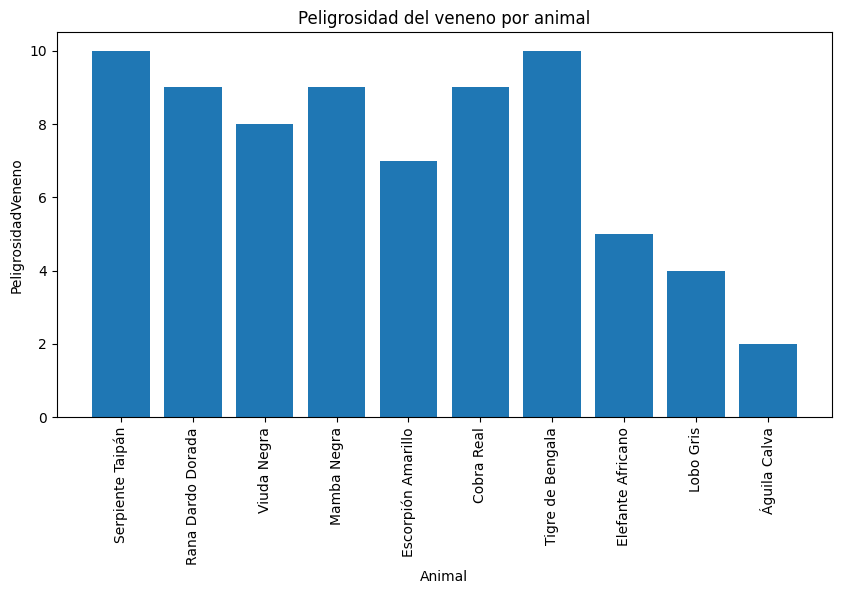

In [89]:
# PROCESAMIENTO CON PANDAS OPCIONAL


import pandas as pd
import numpy as np

# Cargar la tabla "animales" desde SQLite a un DataFrame
df_animales = pd.read_sql("SELECT * FROM animales;", con)
df_ecologia = pd.read_sql("SELECT * FROM ecologia;", con)
#pd.read_sql("SELECT * FROM ecologia;", con)

print("DataFrame animales:")
display(df_animales.head())

print("DataFrame ecologia:")
display(df_ecologia.head())



# 1) Estadísticas descriptivas de peligrosidad

print("Estadísticas descriptivas de PeligrosidadVeneno")
print(df_animales["PeligrosidadVeneno"].describe())


# 2) Normalización de la columna “PeligrosidadVeneno”

df_animales["Peligrosidad_Normalizada"] = (
    (df_animales["PeligrosidadVeneno"] - df_animales["PeligrosidadVeneno"].min()) /
    (df_animales["PeligrosidadVeneno"].max() - df_animales["PeligrosidadVeneno"].min())
)

print("Columna normalizada agregada:")
display(df_animales[["Nombre", "PeligrosidadVeneno", "Peligrosidad_Normalizada"]])


# 3) Unión de tablas (merge) tipo pandas

df_merged = df_animales.merge(df_ecologia, on="id", how="left")
print(" Tabla combinada animales + ecologia:")
display(df_merged.head())


# 4) Filtrar animales con peligrosidad por encima de la media

media = df_animales["PeligrosidadVeneno"].mean()
df_peligrosos = df_animales[df_animales["PeligrosidadVeneno"] > media]

print(" Animales más peligrosos que la media:")
display(df_peligrosos)



# 5) Gráfico simple

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(df_animales["Nombre"], df_animales["PeligrosidadVeneno"])
plt.xticks(rotation=90)
plt.title("Peligrosidad del veneno por animal")
plt.xlabel("Animal")
plt.ylabel("PeligrosidadVeneno")
plt.show()


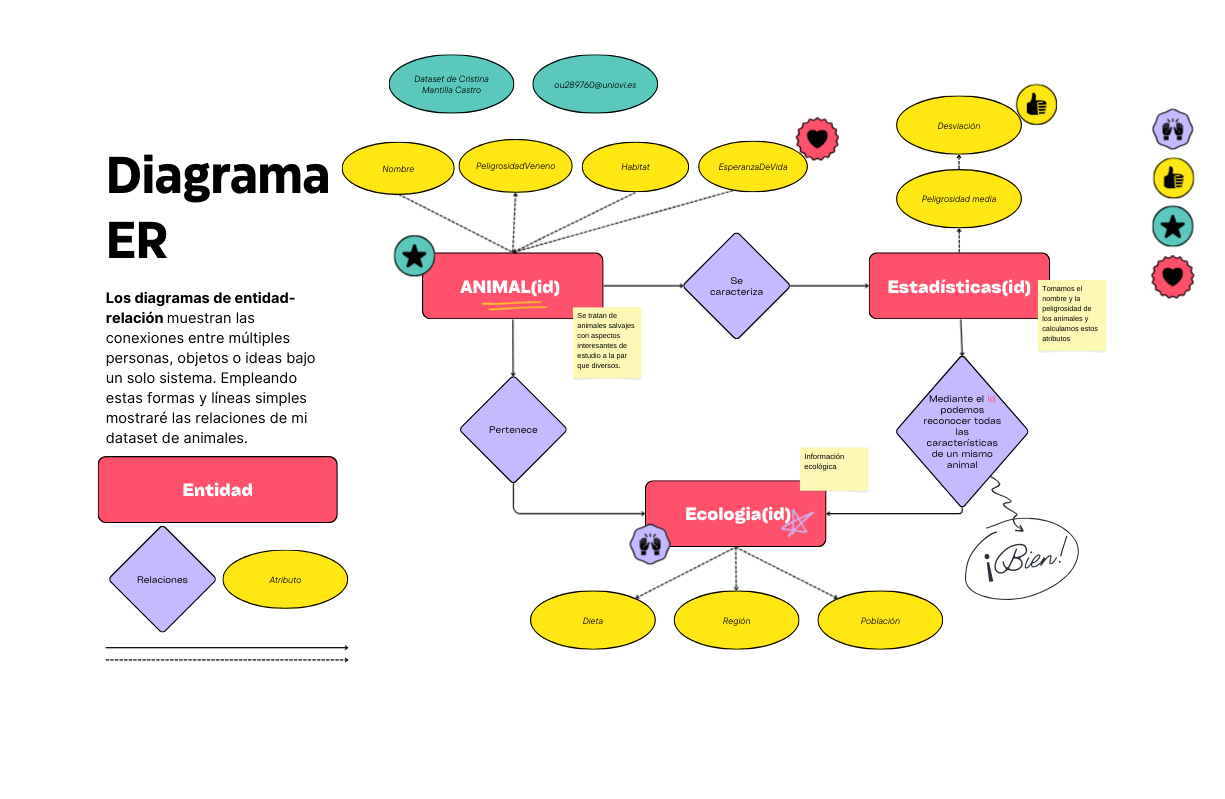